In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots 
import plotly.graph_objects as go


In [2]:
data=pd.read_csv("C:\\Users\\Dell\\OneDrive\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

In [3]:
data.shape

(1470, 35)

In [4]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.drop(columns=['EmployeeCount','Over18','EmployeeNumber','StandardHours'], inplace=True)

In [7]:
data['Education']=data['Education'].replace({1:'High School', 2:'College Going', 3:'Graduate', 4:'Masters', 5:'Doctrate'})
data['EnvironmentSatisfaction']=data['EnvironmentSatisfaction'].replace({1:"Low",2:"Medium",3:"High",4:"Perfect"})
data['JobInvolvement']=data['JobInvolvement'].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["JobLevel"] = data["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",5:"Executive Level"})
data["JobSatisfaction"] = data["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["PerformanceRating"] = data["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["WorkLifeBalance"] = data["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [8]:
data.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                 1  College Going  Life Sciences                  Medium   
1                 8    High School  Life Sciences                    High   
2                 2  College Going          Other                 Perfect   
3                 3        Masters  Life Sciences                 Perfect   
4                 2    High School        Medical                     Low   

   Gender  ...  PerformanceRating RelationshipSatisfaction StockOptionLevel  \
0  Female  ...          Excellent                      Low                0   
1    Male  ...        Outstanding                Very High                1   
2    Male  ...          Excellent                   Medium                0   
3  Female  ...          Excellent                     High                0   
4    Male  ...          Excellent                Very High                1   

  TotalWorkingYears TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                     0             Bad               6   
1                10                     3          Better              10   
2                 7                     3          Better               0   
3                 8                     3          Better               8   
4                 6                     3          Better               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [9]:
attir_rate =data.groupby(['Attrition'], as_index=False)['Attrition'].value_counts()
attir_rate

Attrition  count
0        No   1233
1       Yes    237

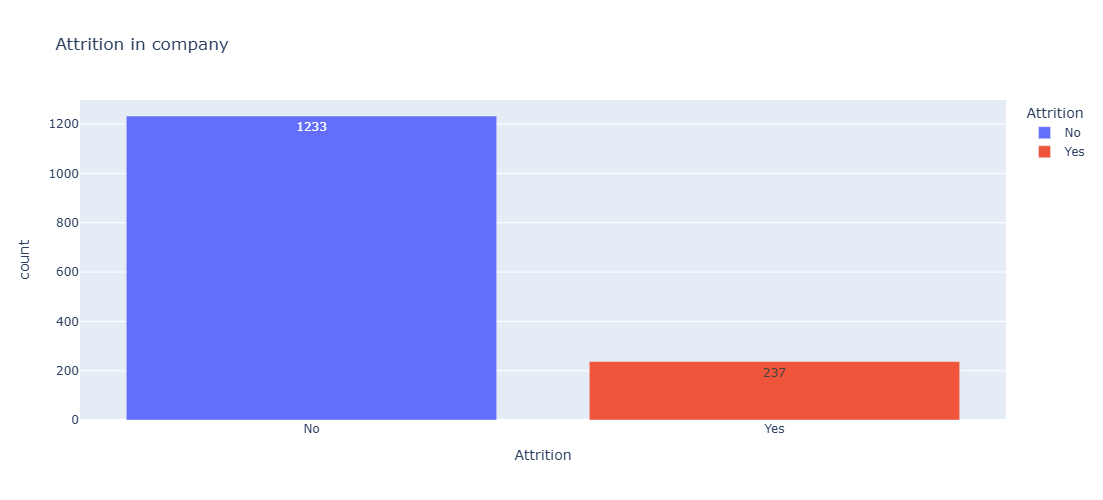

In [10]:
px.bar(attir_rate, x='Attrition', y='count', title='Attrition in company ', text='count',color='Attrition', height=500, width=500)

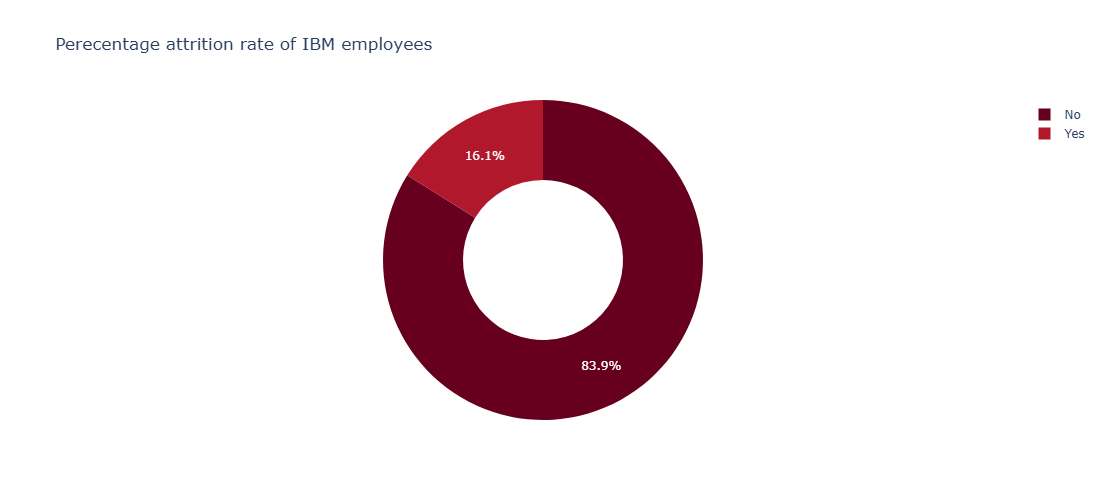

In [11]:
px.pie(attir_rate,values='count', names='Attrition',title="Perecentage attrition rate of IBM employees",width=500,height=500,hole=0.5,
      color_discrete_sequence=px.colors.sequential.RdBu)

In [12]:
#ATTIRATION RATE BY GENDER
attirition_rate=data[data['Attrition']=='Yes']
attir_by_gender=attirition_rate.groupby(['Gender'], as_index=False)['Attrition'].value_counts()
attir_by_gender

Gender Attrition  count
0  Female       Yes     87
1    Male       Yes    150

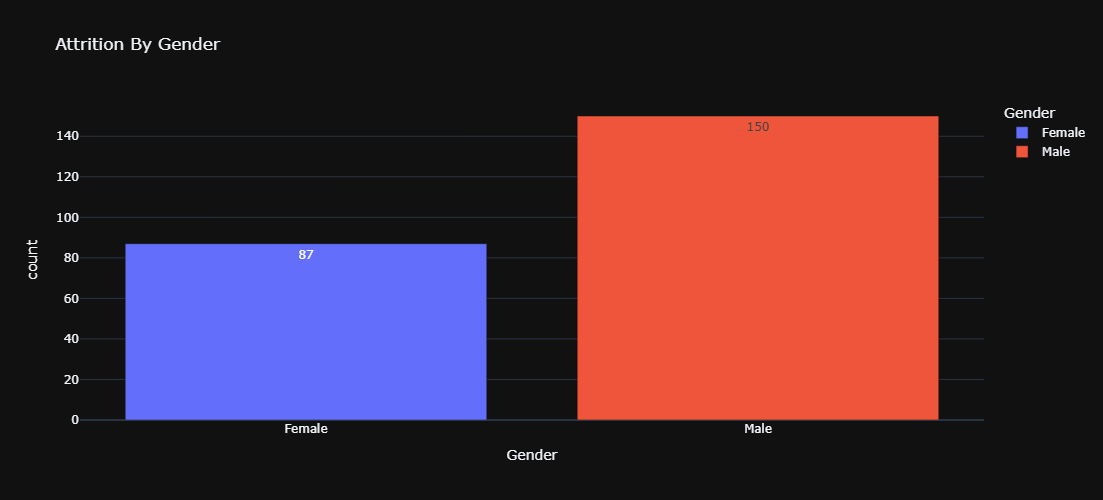

In [13]:
px.bar(attir_by_gender, x='Gender',y='count', color='Gender', template='plotly_dark',title='Attrition By Gender',height=500, width=500,text='count')

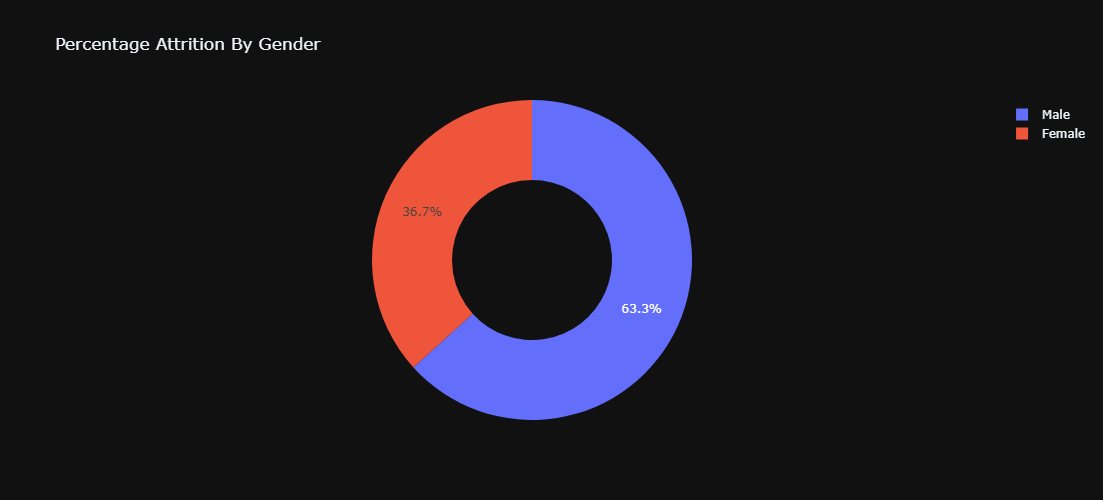

In [14]:
#Percentage Attrition Rate By Gender 
px.pie(attir_by_gender,names='Gender', values='count',height=500, width=500, title='Percentage Attrition By Gender',template='plotly_dark',hole=0.5)

In [15]:
#Attrition By Age 
attrition_by_age=data.groupby(['Age'], as_index=False)['Attrition'].value_counts()
attrition_by_age.head(50)

Age Attrition  count
0    18        No      4
1    18       Yes      4
2    19       Yes      6
3    19        No      3
4    20       Yes      6
5    20        No      5
6    21        No      7
7    21       Yes      6
8    22        No     11
9    22       Yes      5
10   23        No     10
11   23       Yes      4
12   24        No     19
13   24       Yes      7
14   25        No     20
15   25       Yes      6
16   26        No     27
17   26       Yes     12
18   27        No     45
19   27       Yes      3
20   28        No     34
21   28       Yes     14
22   29        No     50
23   29       Yes     18
24   30        No     51
25   30       Yes      9
26   31        No     51
27   31       Yes     18
28   32        No     50
29   32       Yes     11
30   33        No     46
31   33       Yes     12
32   34        No     68
33   34       Yes      9
34   35        No     68
35   35       Yes     10
36   36        No     63
37   36       Yes      6
38   37        No     44
39   37       Yes      6
40   38        No     56
41   38       Yes      2
42   39        No     36
43   39       Yes      6
44   40        No     52
45   40       Yes      5
46   41        No     34
47   41       Yes      6
48   42        No     44
49   42       Yes      2

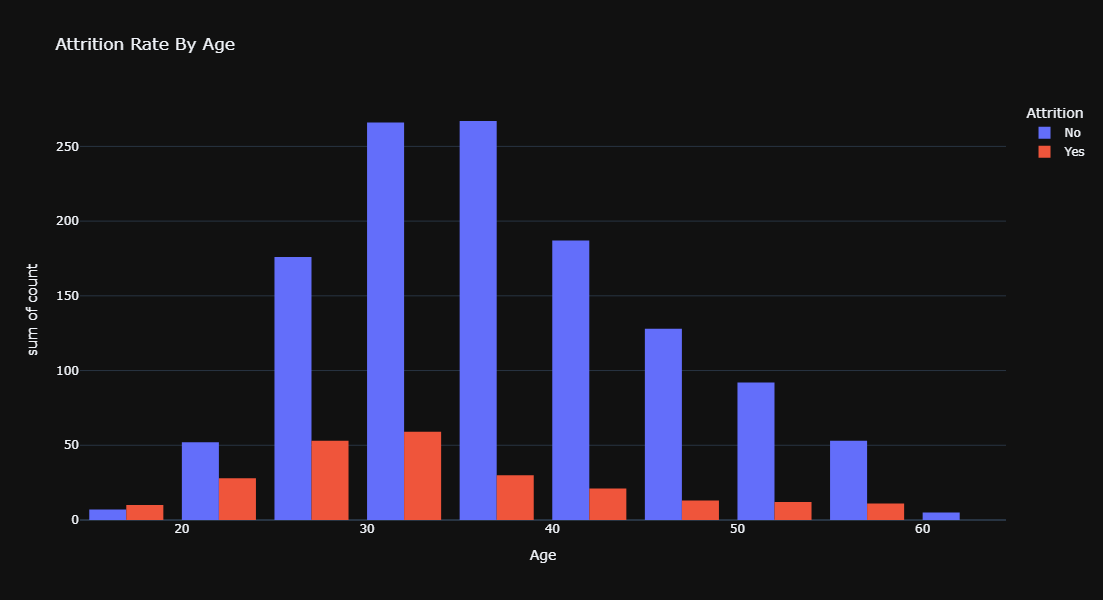

In [16]:
px.histogram(attrition_by_age, x='Age' ,y='count',color='Attrition', title='Attrition Rate By Age',template='plotly_dark', 
             height=600, width=700,barmode='group',nbins=20)

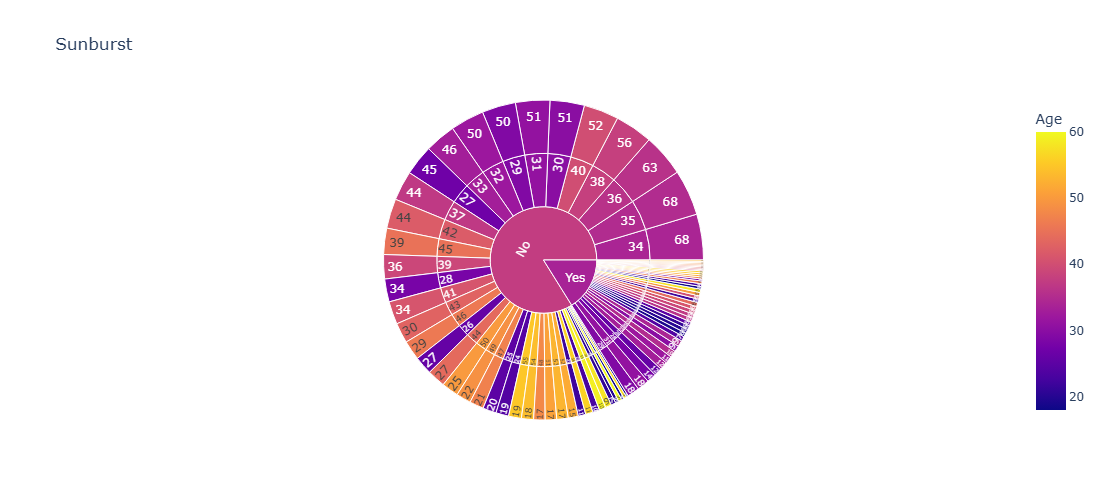

In [17]:
px.sunburst(attrition_by_age, path=['Attrition','Age','count'], values='count',color='Age',title='Sunburst',height=500,width=600)

In [18]:
#Attrition By Business Travel 
attri_rate=data[data['Attrition']=='Yes']
attri_rate

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
2      37       Yes      Travel_Rarely       1373  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
24     34       Yes      Travel_Rarely        699  Research & Development   
...   ...       ...                ...        ...                     ...   
1438   23       Yes  Travel_Frequently        638                   Sales   
1442   29       Yes      Travel_Rarely       1092  Research & Development   
1444   56       Yes      Travel_Rarely        310  Research & Development   
1452   50       Yes  Travel_Frequently        878                   Sales   
1461   50       Yes      Travel_Rarely        410                   Sales   

      DistanceFromHome      Education    EducationField  \
0                    1  College Going     Life Sciences   
2                    2  College Going             Other   
14                  24       Graduate     Life Sciences   
21                   9        Masters     Life Sciences   
24                   6    High School           Medical   
...                ...            ...               ...   
1438                 9       Graduate         Marketing   
1442                 1        Masters           Medical   
1444                 7  College Going  Technical Degree   
1452                 1        Masters     Life Sciences   
1461                28       Graduate         Marketing   

     EnvironmentSatisfaction  Gender  ...  PerformanceRating  \
0                     Medium  Female  ...          Excellent   
2                    Perfect    Male  ...          Excellent   
14                      High    Male  ...          Excellent   
21                      High    Male  ...        Outstanding   
24                    Medium    Male  ...          Excellent   
...                      ...     ...  ...                ...   
1438                 Perfect    Male  ...          Excellent   
1442                     Low    Male  ...          Excellent   
1444                 Perfect    Male  ...          Excellent   
1452                  Medium    Male  ...          Excellent   
1461                 Perfect    Male  ...          Excellent   

     RelationshipSatisfaction StockOptionLevel TotalWorkingYears  \
0                         Low                0                 8   
2                      Medium                0                 7   
14                     Medium                0                 6   
21                     Medium                0                10   
24                       High                0                 8   
...                       ...              ...               ...   
1438                      Low                1                 1   
1442                   Medium                3                 4   
1444                Very High                1                14   
1452                Very High                2                12   
1461                   Medium                1                20   

     TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                        0             Bad               6   
2                        3          Better               0   
14                       4          Better               4   
21                       4          Better               5   
24                       2          Better               4   
...                    ...             ...             ...   
1438                     3            Good               1   
1442                     3            Best               2   
1444                     4             Bad              10   
1452                     3          Better               6   
1461                     3          Better               3   

      YearsInCurrentRole  YearsSinceLastP

In [19]:
attrition_by_travel=attri_rate.groupby(['BusinessTravel'], as_index=False)['Attrition'].value_counts()
attrition_by_travel

BusinessTravel Attrition  count
0         Non-Travel       Yes     12
1  Travel_Frequently       Yes     69
2      Travel_Rarely       Yes    156

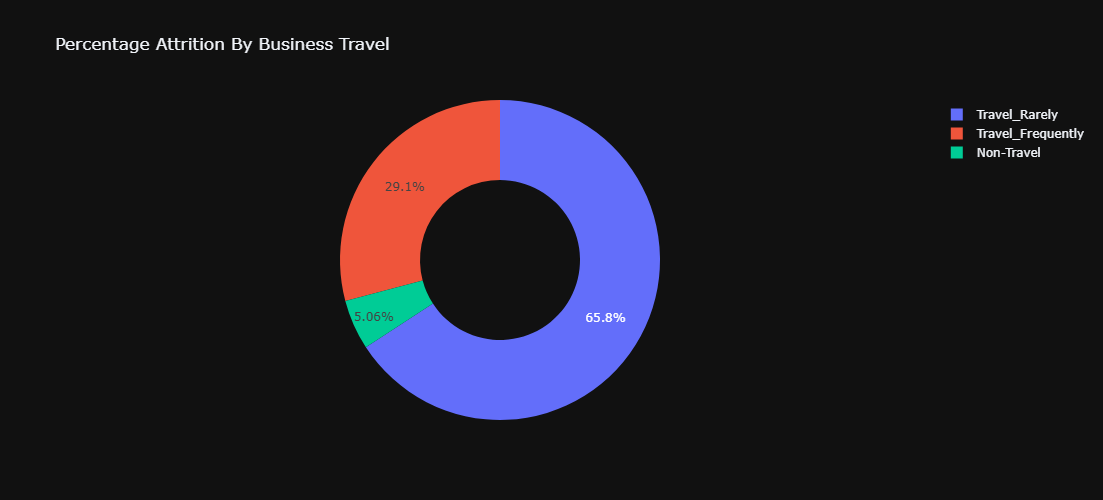

In [20]:
px.pie(attrition_by_travel, names='BusinessTravel', values='count',height=500, width=500, title='Percentage Attrition By Business Travel',template='plotly_dark',hole=0.5)

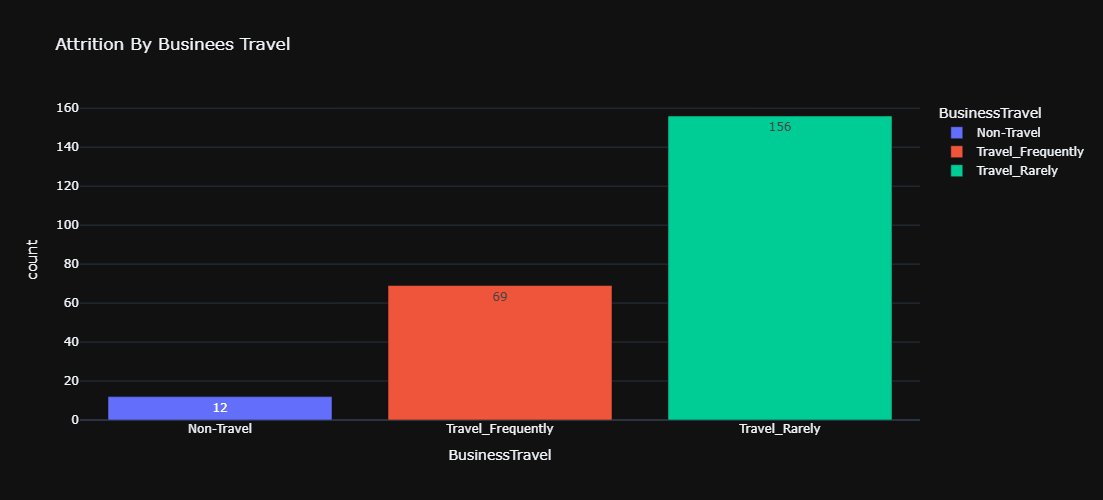

In [21]:
px.bar(attrition_by_travel, x='BusinessTravel', y='count',color='BusinessTravel',template='plotly_dark',title='Attrition By Businees Travel',
       height=500,width=500,text='count')

In [22]:
#Total Employees By Department
employees=data.groupby(['Department'], as_index=False)['Department'].value_counts()
employees

Department  count
0         Human Resources     63
1  Research & Development    961
2                   Sales    446

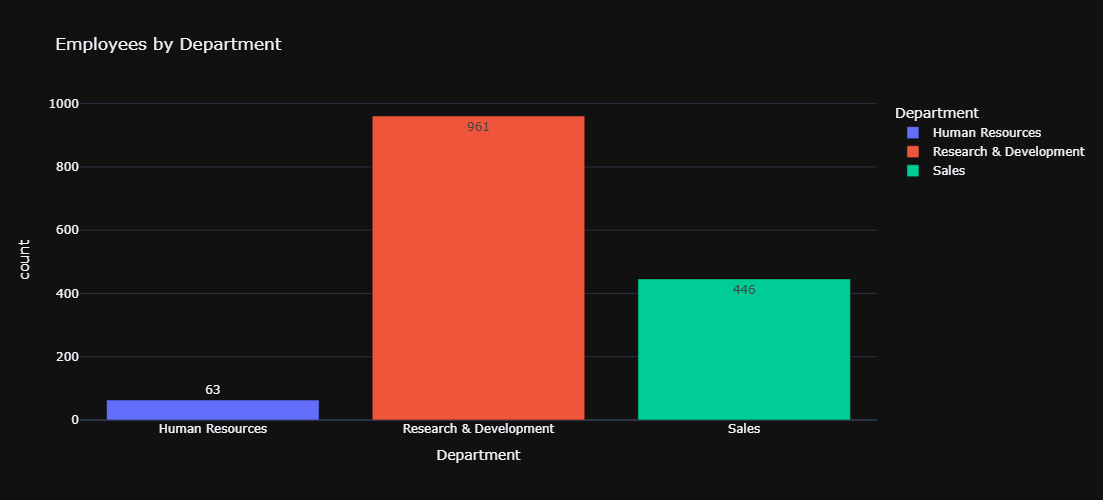

In [23]:
px.bar(employees, x='Department', y='count', title='Employees by Department',height=500,width=500,template='plotly_dark',color='Department',text='count')

In [24]:
#Attrition Department Wise 
attri_rate=data[data['Attrition']=='Yes']
attrition_by_department=attri_rate.groupby(['Department'], as_index=False)['Attrition'].value_counts()
attrition_by_department


Department Attrition  count
0         Human Resources       Yes     12
1  Research & Development       Yes    133
2                   Sales       Yes     92

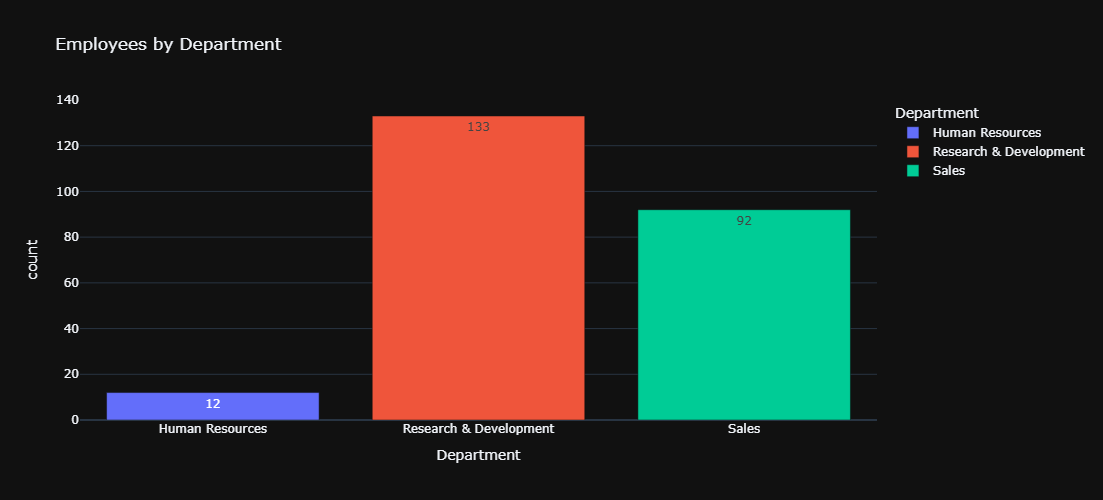

In [25]:
px.bar(attrition_by_department, x='Department', y='count', title='Employees by Department',height=500,width=500,template='plotly_dark',color='Department',text='count')

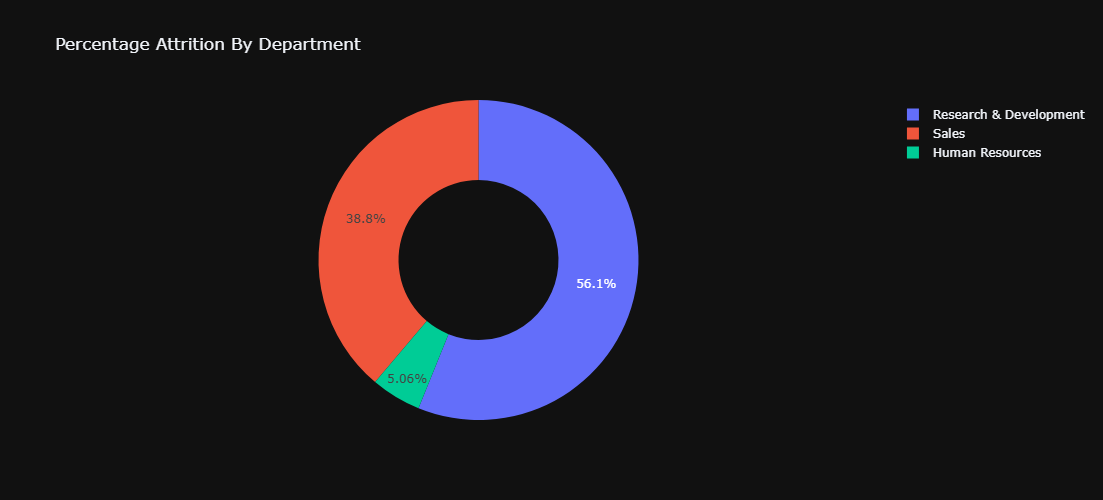

In [26]:
px.pie(attrition_by_department,names='Department',values='count',template='plotly_dark',height=500,width=500,title='Percentage Attrition By Department',hole=0.5)
       

In [27]:
#Daily rate analysis 
bin_edges = [0, 500, 1000, 1500]
bin_labels = ['Low DailyRate', 'Average DailyRate', 'High DailyRate']
data['DailyRateGroup'] = pd.cut(data['DailyRate'], bins=bin_edges, labels=bin_labels)
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                    1  College Going  Life Sciences                  Medium   
1                    8    High School  Life Sciences                    High   
2                    2  College Going          Other                 Perfect   
3                    3        Masters  Life Sciences                 Perfect   
4                    2    High School        Medical                     Low   
...                ...            ...            ...                     ...   
1465                23  College Going        Medical                    High   
1466                 6    High School        Medical                 Perfect   
1467                 4       Graduate  Life Sciences                  Medium   
1468                 2       Graduate        Medical                 Perfect   
1469                 8       Graduate        Medical                  Medium   

      Gender  ...  RelationshipSatisfaction StockOptionLevel  \
0     Female  ...                       Low                0   
1       Male  ...                 Very High                1   
2       Male  ...                    Medium                0   
3     Female  ...                      High                0   
4       Male  ...                 Very High                1   
...      ...  ...                       ...              ...   
1465    Male  ...                      High                1   
1466    Male  ...                       Low                1   
1467    Male  ...                    Medium                1   
1468    Male  ...                 Very High                0   
1469    Male  ...                       Low                0   

     TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany  \
0                    8                     0             Bad              6   
1                   10                     3          Better             10   
2                    7                     3          Better              0   
3                    8                     3          Better              8   
4                    6                     3          Better              2   
...                ...                   ...             ...            ...   
1465                17                     3          Better              5   
1466                 9                     5          Better              7   
1467                 6                     0          Better              6   
1468                17                     3            Good              9   
1469                 6                     3            Best              4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                      4                        0                     5   
1                      7                        1                     7   
2                      0                        0                     0   
3                      7                        3                     0   
4                      2   

In [28]:
#Attrition By Daily Rate 
attri_rate=data[data['Attrition']=='Yes']
attrition_by_daily_rate=attri_rate.groupby(['DailyRateGroup'],as_index=False)['Attrition'].value_counts()
attrition_by_daily_rate

C:\Users\Dell\AppData\Local\Temp\ipykernel_25676\3219075196.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



DailyRateGroup Attrition  count
0      Low DailyRate       Yes     78
1  Average DailyRate       Yes     88
2     High DailyRate       Yes     71

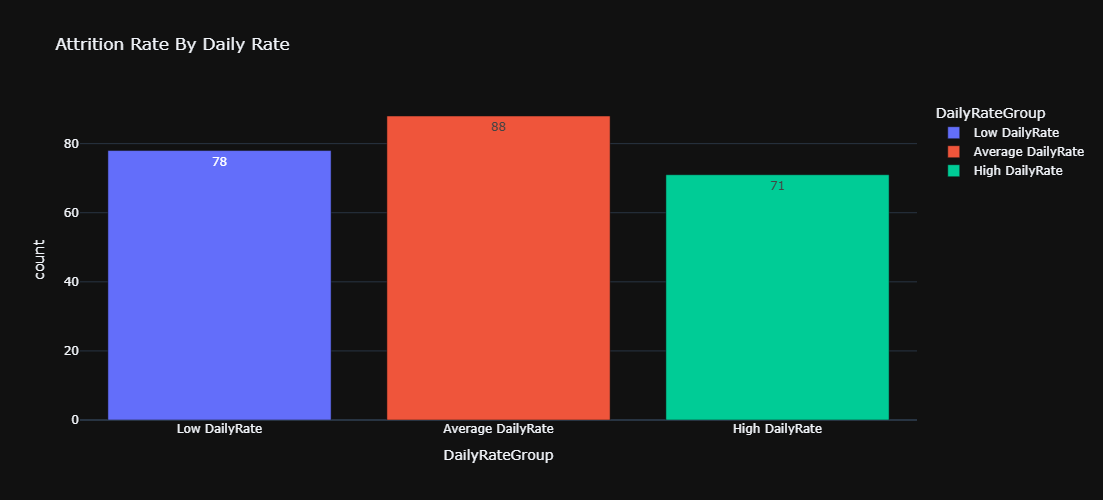

In [29]:
px.bar(attrition_by_daily_rate,x='DailyRateGroup',y='count',title='Attrition Rate By Daily Rate',color='DailyRateGroup',
       template='plotly_dark',height=500,width=500,text='count')

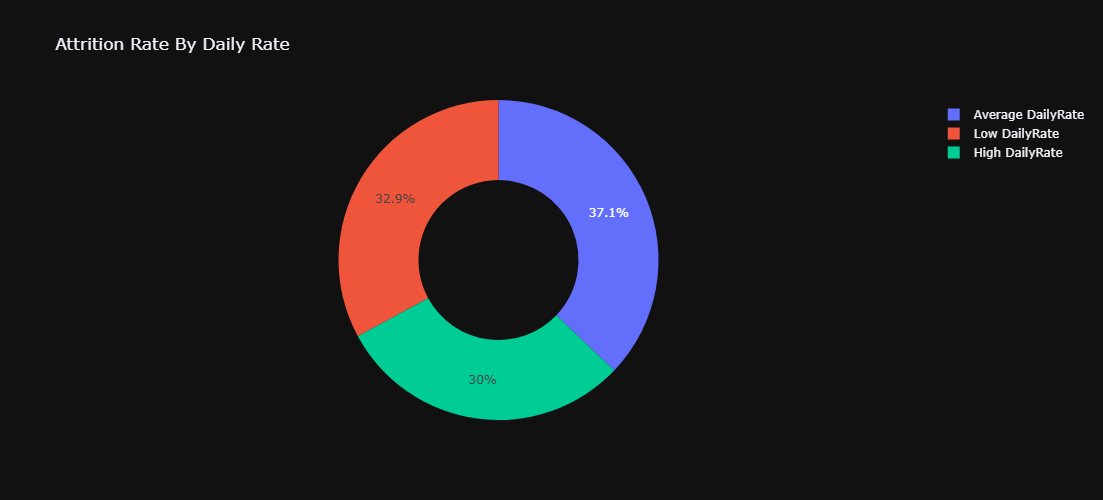

In [30]:
px.pie(attrition_by_daily_rate,names='DailyRateGroup', values='count',height=500,width=500,template='plotly_dark',hole=0.5,title='Attrition Rate By Daily Rate')

In [31]:
#Relationship status attrition
attri_rate=data[data['Attrition']=='Yes']
attrition_by_relationship=attri_rate.groupby(['RelationshipSatisfaction'],as_index=False)['Attrition'].value_counts()
attrition_by_relationship

RelationshipSatisfaction Attrition  count
0                     High       Yes     71
1                      Low       Yes     57
2                   Medium       Yes     45
3                Very High       Yes     64

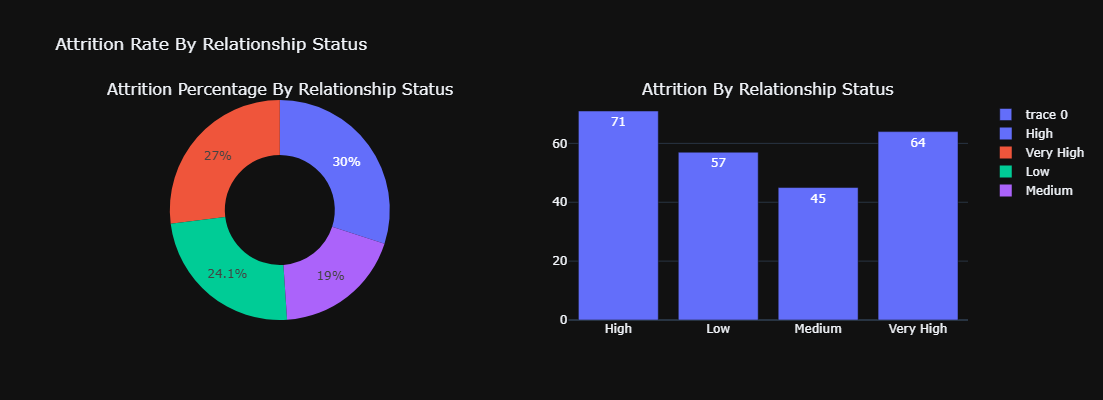

In [32]:
from plotly.subplots import make_subplots 
import plotly.graph_objects as go
specs = [[{'type':'pie'}, {"type": "bar"}]]
fig=make_subplots(rows=1, cols=2,specs=specs,subplot_titles=['Attrition Percentage By Relationship Status','Attrition By Relationship Status'])
fig1=fig.add_trace(go.Bar(x=attrition_by_relationship['RelationshipSatisfaction'], y=attrition_by_relationship['count'],text=attrition_by_relationship['count']),row=1,col=2)
fig2=fig.add_trace(go.Pie(labels=attrition_by_relationship['RelationshipSatisfaction'],values=attrition_by_relationship['count'],hole=0.5),row=1,col=1)
fig.update_layout(height=400, width=1000,template='plotly_dark',title='Attrition Rate By Relationship Status')
fig.show()


In [34]:
attri_rate=data[data['Attrition']=='Yes']
attrition_by_education=attri_rate.groupby(['Education'], as_index=False)['Attrition'].value_counts()
attrition_by_education

Education Attrition  count
0  College Going       Yes     44
1       Doctrate       Yes      5
2       Graduate       Yes     99
3    High School       Yes     31
4        Masters       Yes     58

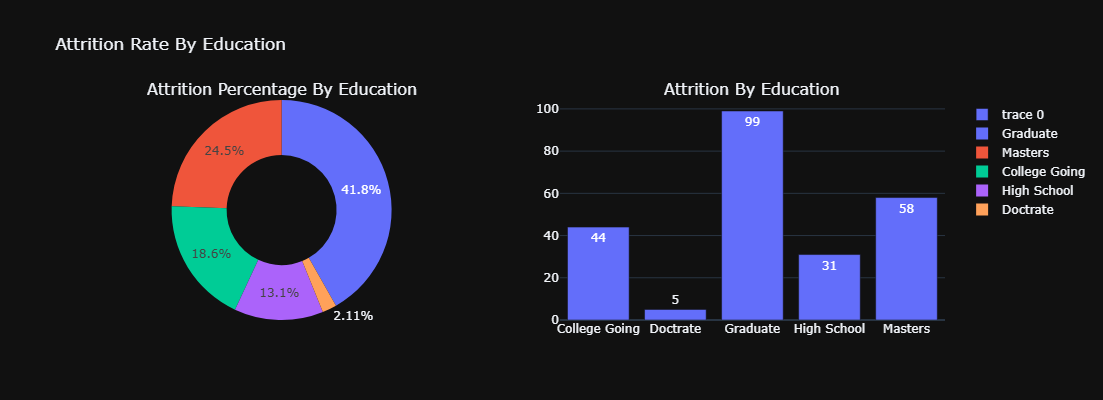

In [35]:
specs = [[{'type':'pie'}, {"type": "bar"}]]
fig=make_subplots(rows=1, cols=2,specs=specs,subplot_titles=['Attrition Percentage By Education','Attrition By Education'])
fig1=fig.add_trace(go.Bar(x=attrition_by_education['Education'], y=attrition_by_education['count'],text=attrition_by_education['count']),row=1,col=2)
fig2=fig.add_trace(go.Pie(labels=attrition_by_education['Education'],values=attrition_by_education['count'],hole=0.5),row=1,col=1)
fig.update_layout(height=400, width=1000,template='plotly_dark',title='Attrition Rate By Education')
fig.show()

In [37]:
attri_rate=data[data['Attrition']=='Yes']
attrition_by_education_field=attri_rate.groupby(['EducationField'], as_index=False)['Attrition'].value_counts()
attrition_by_education_field

EducationField Attrition  count
0   Human Resources       Yes      7
1     Life Sciences       Yes     89
2         Marketing       Yes     35
3           Medical       Yes     63
4             Other       Yes     11
5  Technical Degree       Yes     32

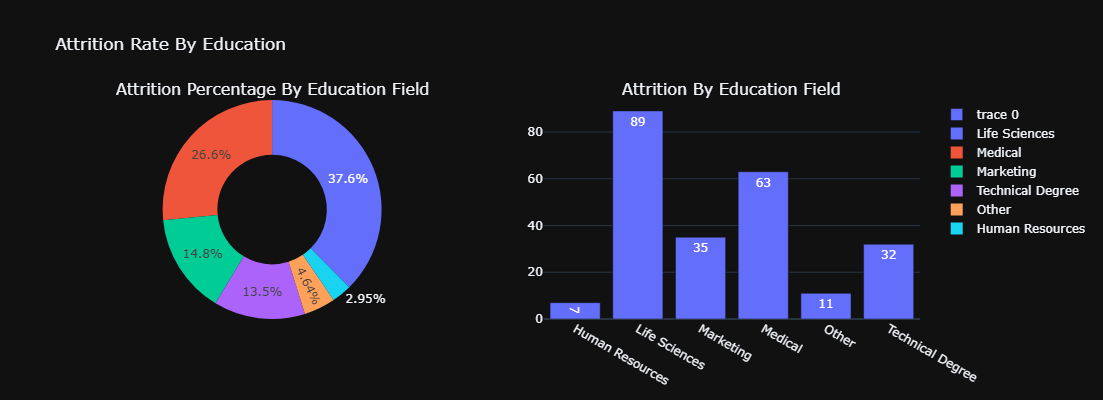

In [39]:
specs = [[{'type':'pie'}, {"type": "bar"}]]
fig=make_subplots(rows=1, cols=2,specs=specs,subplot_titles=['Attrition Percentage By Education Field','Attrition By Education Field'])
fig1=fig.add_trace(go.Bar(x=attrition_by_education_field['EducationField'], y=attrition_by_education_field['count'],text=attrition_by_education_field['count']),row=1,col=2)
fig2=fig.add_trace(go.Pie(labels=attrition_by_education_field['EducationField'],values=attrition_by_education_field['count'],hole=0.5),row=1,col=1)
fig.update_layout(height=400, width=1000,template='plotly_dark',title='Attrition Rate By Education')
fig.show()

In [41]:
attri_rate=data[data['Attrition']=='Yes']
attrition_by_monthly_income=attri_rate.groupby(['MonthlyIncome'], as_index=False)['Attrition'].value_counts()
attrition_by_monthly_income

MonthlyIncome Attrition  count
0             1009       Yes      1
1             1081       Yes      1
2             1091       Yes      1
3             1102       Yes      1
4             1118       Yes      1
..             ...       ...    ...
228          18824       Yes      1
229          19246       Yes      1
230          19545       Yes      1
231          19845       Yes      1
232          19859       Yes      1

[233 rows x 3 columns]

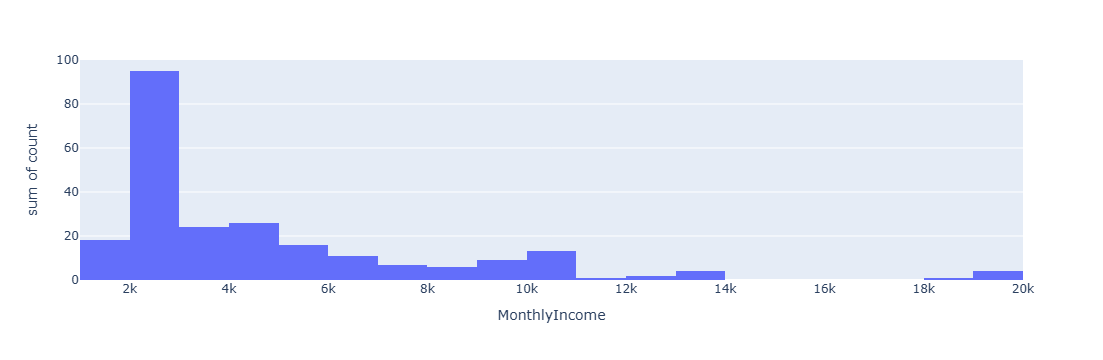

In [43]:
px.histogram(attrition_by_monthly_income,x='MonthlyIncome', y='count')